In [3]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import multipletests

FILE="NGT20.pg_matrix.tsv"

df = pd.read_csv(FILE,sep="\t",index_col=0)
print("before decontamination: "+str(df.shape))

#remove proteins from contaminant database
#contaminants=["ALBU_HUMAN", "AMY1A_HUMAN", "AMY1B_HUMAN", "AMY1C_HUMAN", "ANT3_HUMAN", "ANXA5_HUMAN", "B2MG_HUMAN", "BID_HUMAN", "CAH1_HUMAN", "CAH2_HUMAN", "CATA_HUMAN", "CATD_HUMAN", "CATG_HUMAN", "CO5_HUMAN", "CRP_HUMAN", "CYB5_HUMAN", "CYC_HUMAN", "EGF_HUMAN", "FABPH_HUMAN", "GELS_HUMAN", "GSTA1_HUMAN", "GSTP1_HUMAN", "HBA_HUMAN", "HBB_HUMAN", "HBEGF_HUMAN", "IGF2_HUMAN", "IL8_HUMAN", "INHBA_HUMAN", "INHBB_HUMAN", "KCRM_HUMAN", "LALBA_HUMAN", "LEP_HUMAN", "LYSC_HUMAN", "MYG_HUMAN", "NEDD8_HUMAN", "NQO1_HUMAN", "NQO2_HUMAN", "PDGFB_HUMAN", "PPIA_HUMAN", "PRDX1_HUMAN", "RASH_HUMAN", "RET4_HUMAN", "RS27A_HUMAN", "SODC_HUMAN", "SUMO1_HUMAN", "HARS1_HUMAN", "TAU_HUMAN", "THIO_HUMAN", "TNFA_HUMAN", "TRFE_HUMAN", "TRFL_HUMAN", "UB2E1_HUMAN", "UBE2C_HUMAN", "K1C26_HUMAN", "K2C3_HUMAN", "K1C15_HUMAN", "K2C79_HUMAN", "K2C6B_HUMAN", "K1C17_HUMAN", "K2C4_HUMAN", "K2C73_HUMAN", "K2C71_HUMAN", "K2C7_HUMAN", "K2C8_HUMAN", "K1C39_HUMAN", "K1C18_HUMAN", "K1C28_HUMAN", "K1C16_HUMAN", "K2C1_HUMAN", "K2C5_HUMAN", "K2C80_HUMAN", "K2C1B_HUMAN", "K2C75_HUMAN", "K2C6A_HUMAN", "K2C72_HUMAN", "K1C24_HUMAN", "K1C19_HUMAN", "K2C74_HUMAN", "K1C27_HUMAN", "K1C20_HUMAN", "K1C9_HUMAN", "K1C23_HUMAN", "K1C12_HUMAN", "K1C14_HUMAN", "K2C6C_HUMAN", "K1C10_HUMAN", "K1C13_HUMAN", "K22O_HUMAN", "K1C25_HUMAN", "K2C78_HUMAN", "K22E_HUMAN", "K1C40_HUMAN", "KRT85_HUMAN", "KRT38_HUMAN", "KRT34_HUMAN", "KRT86_HUMAN", "KRT35_HUMAN", "KT33B_HUMAN", "KRT81_HUMAN", "KRT37_HUMAN", "KT33A_HUMAN", "KRT83_HUMAN", "K1H1_HUMAN", "KRT82_HUMAN", "K1H2_HUMAN", "KRT36_HUMAN", "KRT84_HUMAN"]
contaminants=["P02768", "P0DUB6", "P0DTE7", "P0DTE8", "P01008", "P08758", "P61769", "P55957", "P00915", "P00918", "P04040", "P07339", "P08311", "P01031", "P02741", "P00167", "P99999", "P01133", "P05413", "P06396", "P08263", "P09211", "P69905", "P68871", "Q99075", "P01344", "P10145", "P08476", "P09529", "P06732", "P00709", "P41159", "P61626", "P02144", "Q15843", "P15559", "P16083", "P01127", "P62937", "Q06830", "P01112", "P02753", "P62979", "P00441", "P63165", "P12081", "P10636", "P10599", "P01375", "P02787", "P02788", "P51965", "O00762", "Q7Z3Y9", "P12035", "P19012", "Q5XKE5", "P04259", "Q04695", "P19013", "Q86Y46", "Q3SY84", "P08729", "P05787", "Q6A163", "P05783", "Q7Z3Y7", "P08779", "P04264", "P13647", "Q6KB66", "Q7Z794", "O95678", "P02538", "Q14CN4", "Q2M2I5", "P08727", "Q7RTS7", "Q7Z3Y8", "P35900", "P35527", "Q9C075", "Q99456", "P02533", "P48668", "P13645", "P13646", "Q01546", "Q7Z3Z0", "Q8N1N4", "P35908", "Q6A162", "P78386", "O76015", "O76011", "O43790", "Q92764", "Q14525", "Q14533", "O76014", "O76009", "P78385", "Q15323", "Q9NSB4", "Q14532", "O76013", "Q9NSB2"]
df = df[~df.index.isin(contaminants)]

print("after decontamination: "+str(df.shape))
df.head()


before decontamination: (7418, 135)
after decontamination: (7373, 135)


,Protein.Names,Genes,First.Protein.Description,../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-119_10uM_2-1.mzML,../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-114_1uM_1-1.mzML,../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-113_10uM_1-2.mzML,../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-17_10uM_1-1.mzML,../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-17_1uM_1-2.mzML,../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-16_10uM_1-1.mzML,../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-15_10uM_2-1.mzML,...,../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-19_1uM_1-1.mzML,../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-13_10uM_1-2.mzML,../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-15_1uM_1-2.mzML,../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-18_1uM_1-2.mzML,../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-119_1uM_2-1.mzML,../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-117_1uM_2-2.mzML,../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-110_10uM_1-1.mzML,../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-117_10uM_1-2.mzML,../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-119_10uM_1-1.mzML,../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-118_1uM_2-2.mzML
Protein.Group,,,,,,,,,,,,,,,,,,,,,
A0A024RBG1;Q9NZJ9-2,NUD4B_HUMAN;NUDT4_HUMAN,NUDT4;NUDT4B,Diphosphoinositol polyphosphate phosphohydrola...,88711.5,197526.0,228515.0,163742.0,149246.0,108409.0,175657.0,...,162336.0,156976.0,132108.0,130529.0,95005.6,216563.0,211327.0,233423.0,122262.0,NaN
A0A075B6H7;A0A0C4DH55;P01624,KV315_HUMAN;KV37_HUMAN;KVD07_HUMAN,IGKV3-15;IGKV3-7;IGKV3D-7,Probable non-functional immunoglobulin kappa v...,49648.9,56265.6,54476.7,51895.6,51516.7,43216.5,67193.6,...,49999.3,NaN,54996.1,56029.0,NaN,38061.2,50951.3,NaN,47017.0,NaN
A0A075B6S6;A0A087WW87;A0A0A0MRZ7;P01614;A0A075B6P5;P01615;P06310;A0A075B6S2;A2NJV5,KV228_HUMAN;KV229_HUMAN;KV230_HUMAN;KV240_HUMA...,IGKV2-28;IGKV2-29;IGKV2-30;IGKV2-40;IGKV2D-26;...,Immunoglobulin kappa variable 2-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0A075B6Y3,TJA3_HUMAN,TRAJ3,T cell receptor alpha joining 3,NaN,274922.0,269194.0,340204.0,249014.0,323032.0,NaN,...,250596.0,340733.0,274478.0,335762.0,NaN,135161.0,237675.0,NaN,NaN,NaN
A0A087WTJ2,A0A087WTJ2_HUMAN,GIMAP1-GIMAP5,GIMAP1-GIMAP5 readthrough,40120.6,32459.1,29795.8,27229.5,38713.5,18659.6,31259.0,...,28848.6,34718.2,17605.7,28117.1,35756.6,43282.1,32180.3,31836.0,35357.7,NaN


In [10]:
group_columns = {
    'DMSO': [x for x in df.columns if "DMSO" in x],
    'NGT20-11_1uM': [x for x in df.columns if "NGT20-11_1uM" in x],
    'NGT20-12_1uM': [x for x in df.columns if "NGT20-12_1uM" in x],
    'NGT20-13_1uM': [x for x in df.columns if "NGT20-13_1uM" in x],
    'NGT20-14_1uM': [x for x in df.columns if "NGT20-14_1uM" in x],
    'NGT20-15_1uM': [x for x in df.columns if "NGT20-15_1uM" in x],
    'NGT20-16_1uM': [x for x in df.columns if "NGT20-16_1uM" in x],
    'NGT20-17_1uM': [x for x in df.columns if "NGT20-17_1uM" in x],
    'NGT20-18_1uM': [x for x in df.columns if "NGT20-18_1uM" in x],
    'NGT20-19_1uM': [x for x in df.columns if "NGT20-19_1uM" in x],
    'NGT20-110_1uM': [x for x in df.columns if "NGT20-110_1uM" in x],
    'NGT20-111_1uM': [x for x in df.columns if "NGT20-111_1uM" in x],
    'NGT20-113_1uM': [x for x in df.columns if "NGT20-113_1uM" in x],
    'NGT20-114_1uM': [x for x in df.columns if "NGT20-114_1uM" in x],
    'NGT20-117_1uM': [x for x in df.columns if "NGT20-117_1uM" in x],
    'NGT20-118_1uM': [x for x in df.columns if "NGT20-118_1uM" in x],
    'NGT20-119_1uM': [x for x in df.columns if "NGT20-119_1uM" in x],
    'NGT20-120_1uM': [x for x in df.columns if "NGT20-120_1uM" in x],
    'NGT20-13_10uM': [x for x in df.columns if "NGT20-13_10uM" in x],
    'NGT20-14_10uM': [x for x in df.columns if "NGT20-14_10uM" in x],
    'NGT20-15_10uM': [x for x in df.columns if "NGT20-15_10uM" in x],
    'NGT20-16_10uM': [x for x in df.columns if "NGT20-16_10uM" in x],
    'NGT20-17_10uM': [x for x in df.columns if "NGT20-17_10uM" in x],
    'NGT20-18_10uM': [x for x in df.columns if "NGT20-18_10uM" in x],
    'NGT20-19_10uM': [x for x in df.columns if "NGT20-19_10uM" in x],
    'NGT20-110_10uM': [x for x in df.columns if "NGT20-110_10uM" in x],
    'NGT20-111_10uM': [x for x in df.columns if "NGT20-111_10uM" in x],
    'NGT20-113_10uM': [x for x in df.columns if "NGT20-113_10uM" in x],
    'NGT20-114_10uM': [x for x in df.columns if "NGT20-114_10uM" in x],
    'NGT20-117_10uM': [x for x in df.columns if "NGT20-117_10uM" in x],
    'NGT20-118_10uM': [x for x in df.columns if "NGT20-118_10uM" in x],
    'NGT20-119_10uM': [x for x in df.columns if "NGT20-119_10uM" in x],
    'NGT20-120_10uM': [x for x in df.columns if "NGT20-120_10uM" in x],
    }

print(group_columns)
for key in group_columns:
    print(str(key)+": "+str(len(group_columns[key])))


{'DMSO': ['../Astral_data/20241203_NGT20/20241125_Jurkat200ng_DMSO_4-2.mzML', '../Astral_data/20241203_NGT20/20241125_Jurkat200ng_DMSO_4-1.mzML', '../Astral_data/20241203_NGT20/20241125_Jurkat200ng_DMSO_3-2.mzML', '../Astral_data/20241203_NGT20/20241125_Jurkat200ng_DMSO_3-1.mzML'], 'NGT20-11_1uM': ['../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-11_1uM_2-1.mzML', '../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-11_1uM_1-1.mzML', '../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-11_1uM_1-2.mzML', '../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-11_1uM_2-2.mzML'], 'NGT20-12_1uM': ['../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-12_1uM_1-1.mzML', '../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-12_1uM_1-2.mzML', '../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-12_1uM_2-1.mzML', '../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-12_1uM_2-2.mzML'], 'NGT20-13_1uM': ['../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT2

In [13]:
# Calculate FC value and append to the right side
def calculate_average_FC_value(df, treated_group_name, control_group_name):
    control_group = group_columns[control_group_name]
    treated_group = group_columns[treated_group_name]
    
    control_avg = df[control_group].mean(axis=1)
    treated_avg = df[treated_group].mean(axis=1)
    
    FC_values = treated_avg / control_avg
    
    FC_column_name = f'FC_{treated_group_name}_vs_{control_group_name}'
    df[FC_column_name] = FC_values
    
    log2FC_values = np.log2(FC_values)
    
    log2FC_column_name = f'log2FC_{treated_group_name}_vs_{control_group_name}'
    df[log2FC_column_name] = log2FC_values
    
    return df

# Calculate FC values for PS10_200nM vs DMSO and PS10NW_200nM vs DMSO
reference_group = "DMSO"

for key in group_columns:
    if key != reference_group:  # Skip the reference group
        df = calculate_average_FC_value(df, key, reference_group)


df.head()

,Protein.Names,Genes,First.Protein.Description,../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-119_10uM_2-1.mzML,../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-114_1uM_1-1.mzML,../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-113_10uM_1-2.mzML,../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-17_10uM_1-1.mzML,../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-17_1uM_1-2.mzML,../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-16_10uM_1-1.mzML,../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-15_10uM_2-1.mzML,...,FC_NGT20-114_10uM_vs_DMSO,log2FC_NGT20-114_10uM_vs_DMSO,FC_NGT20-117_10uM_vs_DMSO,log2FC_NGT20-117_10uM_vs_DMSO,FC_NGT20-118_10uM_vs_DMSO,log2FC_NGT20-118_10uM_vs_DMSO,FC_NGT20-119_10uM_vs_DMSO,log2FC_NGT20-119_10uM_vs_DMSO,FC_NGT20-120_10uM_vs_DMSO,log2FC_NGT20-120_10uM_vs_DMSO
Protein.Group,,,,,,,,,,,,,,,,,,,,,
A0A024RBG1;Q9NZJ9-2,NUD4B_HUMAN;NUDT4_HUMAN,NUDT4;NUDT4B,Diphosphoinositol polyphosphate phosphohydrola...,88711.5,197526.0,228515.0,163742.0,149246.0,108409.0,175657.0,...,1.587295,0.666570,1.334176,0.415949,1.241807,0.312441,1.023528,0.033551,1.041998,0.059352
A0A075B6H7;A0A0C4DH55;P01624,KV315_HUMAN;KV37_HUMAN;KVD07_HUMAN,IGKV3-15;IGKV3-7;IGKV3D-7,Probable non-functional immunoglobulin kappa v...,49648.9,56265.6,54476.7,51895.6,51516.7,43216.5,67193.6,...,0.980128,-0.028958,0.833505,-0.262738,0.977061,-0.033480,0.830757,-0.267501,0.717951,-0.478042
A0A075B6S6;A0A087WW87;A0A0A0MRZ7;P01614;A0A075B6P5;P01615;P06310;A0A075B6S2;A2NJV5,KV228_HUMAN;KV229_HUMAN;KV230_HUMAN;KV240_HUMA...,IGKV2-28;IGKV2-29;IGKV2-30;IGKV2-40;IGKV2D-26;...,Immunoglobulin kappa variable 2-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0A075B6Y3,TJA3_HUMAN,TRAJ3,T cell receptor alpha joining 3,NaN,274922.0,269194.0,340204.0,249014.0,323032.0,NaN,...,NaN,NaN,0.614607,-0.702264,0.499232,-1.002218,0.349512,-1.516585,0.664458,-0.589751
A0A087WTJ2,A0A087WTJ2_HUMAN,GIMAP1-GIMAP5,GIMAP1-GIMAP5 readthrough,40120.6,32459.1,29795.8,27229.5,38713.5,18659.6,31259.0,...,1.051421,0.072341,1.184154,0.243856,1.077718,0.107980,1.191238,0.252462,0.596283,-0.745931


In [15]:
# Function to perform a student t-test
def student_t_test(row, treated_group_name, control_group_name,min_valid_value=3): # valid value = Not NaN
    treated_values = row[group_columns[treated_group_name]].dropna().values
    control_values = row[group_columns[control_group_name]].dropna().values
    
    if len(treated_values) <min_valid_value or len(control_values) <min_valid_value:
        return np.nan
    
    return ttest_ind(treated_values, control_values, equal_var=True).pvalue

# Iterate over group_columns to calculate p-values
for key in group_columns:
    if key != reference_group:  # Skip the reference group
        pvalue_column_name = f'Pvalue_{key}_vs_{reference_group}'
        df[pvalue_column_name] = df.apply(
            student_t_test,
            axis=1,
            treated_group_name=key,
            control_group_name=reference_group
        )


# Display the updated DataFrame
df.head()

,Protein.Names,Genes,First.Protein.Description,../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-119_10uM_2-1.mzML,../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-114_1uM_1-1.mzML,../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-113_10uM_1-2.mzML,../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-17_10uM_1-1.mzML,../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-17_1uM_1-2.mzML,../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-16_10uM_1-1.mzML,../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-15_10uM_2-1.mzML,...,Pvalue_NGT20-18_10uM_vs_DMSO,Pvalue_NGT20-19_10uM_vs_DMSO,Pvalue_NGT20-110_10uM_vs_DMSO,Pvalue_NGT20-111_10uM_vs_DMSO,Pvalue_NGT20-113_10uM_vs_DMSO,Pvalue_NGT20-114_10uM_vs_DMSO,Pvalue_NGT20-117_10uM_vs_DMSO,Pvalue_NGT20-118_10uM_vs_DMSO,Pvalue_NGT20-119_10uM_vs_DMSO,Pvalue_NGT20-120_10uM_vs_DMSO
Protein.Group,,,,,,,,,,,,,,,,,,,,,
A0A024RBG1;Q9NZJ9-2,NUD4B_HUMAN;NUDT4_HUMAN,NUDT4;NUDT4B,Diphosphoinositol polyphosphate phosphohydrola...,88711.5,197526.0,228515.0,163742.0,149246.0,108409.0,175657.0,...,0.078116,0.597022,0.179642,0.142005,0.009658,0.068381,0.272586,0.411867,0.945379,0.880953
A0A075B6H7;A0A0C4DH55;P01624,KV315_HUMAN;KV37_HUMAN;KVD07_HUMAN,IGKV3-15;IGKV3-7;IGKV3D-7,Probable non-functional immunoglobulin kappa v...,49648.9,56265.6,54476.7,51895.6,51516.7,43216.5,67193.6,...,NaN,0.151087,0.576499,0.051722,0.361829,0.755265,0.003914,0.724139,0.068963,0.056336
A0A075B6S6;A0A087WW87;A0A0A0MRZ7;P01614;A0A075B6P5;P01615;P06310;A0A075B6S2;A2NJV5,KV228_HUMAN;KV229_HUMAN;KV230_HUMAN;KV240_HUMA...,IGKV2-28;IGKV2-29;IGKV2-30;IGKV2-40;IGKV2D-26;...,Immunoglobulin kappa variable 2-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0A075B6Y3,TJA3_HUMAN,TRAJ3,T cell receptor alpha joining 3,NaN,274922.0,269194.0,340204.0,249014.0,323032.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0A087WTJ2,A0A087WTJ2_HUMAN,GIMAP1-GIMAP5,GIMAP1-GIMAP5 readthrough,40120.6,32459.1,29795.8,27229.5,38713.5,18659.6,31259.0,...,0.839292,0.922477,0.884393,0.944200,0.514796,0.721186,0.448774,0.791200,NaN,NaN


In [16]:
# Apply Benjamini-Hochberg FDR correction, handling NaN values
def apply_bh_fdr(p_values):
    mask = np.isfinite(p_values)
    p_values_corrected = np.full(p_values.shape, np.nan)
    p_values_corrected[mask] = multipletests(p_values[mask], method='fdr_bh')[1]
    return p_values_corrected

# Apply BH FDR correction for each set of p-values
for key in group_columns:
    if key != reference_group:  # Skip the reference group
        bhFDR_column_name = f'bh_FDR_{key}_vs_{reference_group}'
        df[bhFDR_column_name] = apply_bh_fdr(df[f'Pvalue_{key}_vs_{reference_group}'])


df.head()


,Protein.Names,Genes,First.Protein.Description,../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-119_10uM_2-1.mzML,../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-114_1uM_1-1.mzML,../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-113_10uM_1-2.mzML,../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-17_10uM_1-1.mzML,../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-17_1uM_1-2.mzML,../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-16_10uM_1-1.mzML,../Astral_data/20241203_NGT20/20241125_Jurkat200ng_NGT20-15_10uM_2-1.mzML,...,bh_FDR_NGT20-18_10uM_vs_DMSO,bh_FDR_NGT20-19_10uM_vs_DMSO,bh_FDR_NGT20-110_10uM_vs_DMSO,bh_FDR_NGT20-111_10uM_vs_DMSO,bh_FDR_NGT20-113_10uM_vs_DMSO,bh_FDR_NGT20-114_10uM_vs_DMSO,bh_FDR_NGT20-117_10uM_vs_DMSO,bh_FDR_NGT20-118_10uM_vs_DMSO,bh_FDR_NGT20-119_10uM_vs_DMSO,bh_FDR_NGT20-120_10uM_vs_DMSO
Protein.Group,,,,,,,,,,,,,,,,,,,,,
A0A024RBG1;Q9NZJ9-2,NUD4B_HUMAN;NUDT4_HUMAN,NUDT4;NUDT4B,Diphosphoinositol polyphosphate phosphohydrola...,88711.5,197526.0,228515.0,163742.0,149246.0,108409.0,175657.0,...,0.272442,0.738910,0.352391,0.257851,0.065727,0.216771,0.438383,0.628687,0.968612,0.941810
A0A075B6H7;A0A0C4DH55;P01624,KV315_HUMAN;KV37_HUMAN;KVD07_HUMAN,IGKV3-15;IGKV3-7;IGKV3D-7,Probable non-functional immunoglobulin kappa v...,49648.9,56265.6,54476.7,51895.6,51516.7,43216.5,67193.6,...,NaN,0.303485,0.727617,0.125439,0.547557,0.866054,0.030196,0.844495,0.174996,0.190143
A0A075B6S6;A0A087WW87;A0A0A0MRZ7;P01614;A0A075B6P5;P01615;P06310;A0A075B6S2;A2NJV5,KV228_HUMAN;KV229_HUMAN;KV230_HUMAN;KV240_HUMA...,IGKV2-28;IGKV2-29;IGKV2-30;IGKV2-40;IGKV2D-26;...,Immunoglobulin kappa variable 2-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0A075B6Y3,TJA3_HUMAN,TRAJ3,T cell receptor alpha joining 3,NaN,274922.0,269194.0,340204.0,249014.0,323032.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0A087WTJ2,A0A087WTJ2_HUMAN,GIMAP1-GIMAP5,GIMAP1-GIMAP5 readthrough,40120.6,32459.1,29795.8,27229.5,38713.5,18659.6,31259.0,...,0.925361,0.956413,0.937192,0.964457,0.677953,0.841718,0.613608,0.885412,NaN,NaN


In [ ]:
df.to_csv(FILE.split(".")[0]+"_analyzed.csv")


In [4]:
# Volcano Plot
import matplotlib.pylab as plt
import seaborn as sns
from adjustText import adjust_text

def volcano_plot(treatment_group, control_group, logFC_cutoff=1, logFC_cutoff2=None, FDR_cutoff=0.05, file_suffix="", highlight_genes=[], protein_level_cutoff=None):
    logFC="log2FC_"+treatment_group+"_vs_"+control_group
    FDR="bh_FDR_"+treatment_group+"_vs_"+control_group
    plt.figure(figsize=(12, 9))

    plt.scatter(x=df[logFC],y=df[FDR].apply(lambda x:-np.log10(x)),s=1, color="grey")

    down = df[(df[logFC]<=-logFC_cutoff)&(df[FDR]<=FDR_cutoff)]
    if logFC_cutoff2:    
        slight_down = df[(df[logFC]>-logFC_cutoff) & (df[logFC]<=-logFC_cutoff2)&(df[FDR]<=FDR_cutoff)]
    else:
        slight_down = None

    up = df[(df[logFC]>=logFC_cutoff)&(df[FDR]<=FDR_cutoff)]
    
    plt.scatter(x=up[logFC],y=up[FDR].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")

    if not (logFC_cutoff2 or protein_level_cutoff):
        plt.scatter(x=down[logFC],y=down[FDR].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
    
    if logFC_cutoff2:
        plt.scatter(x=down[logFC],y=down[FDR].apply(lambda x:-np.log10(x)),s=3,label=">50% Down-regulated",color="blue")
        plt.scatter(x=slight_down[logFC],y=slight_down[FDR].apply(lambda x:-np.log10(x)),s=3,label="30-50% Down-regulated",color="turquoise")
    
    if protein_level_cutoff:
        lowabundance_down=df[(df[logFC]<=-logFC_cutoff) & (df[FDR]<=FDR_cutoff) & (df[group_columns[control_group]].mean(axis=1)<1000)]
        plt.scatter(x=down[logFC],y=down[FDR].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
        plt.scatter(x=lowabundance_down[logFC],y=lowabundance_down[FDR].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated, protein level<"+str(protein_level_cutoff),color="turquoise")

    if highlight_genes:
        highlight = df.loc[highlight_genes]
        plt.scatter(x=highlight[logFC], y=highlight[FDR].apply(lambda x:-np.log10(x)), color='green')
    else:
        highlight = None

    
    texts=[]
    for i,r in pd.concat([up,down,slight_down,highlight]).drop_duplicates().iterrows():
        #texts.append(plt.text(x=r[logFC],y=-np.log10(r[FDR]),s=i.split("_")[0]))
        texts.append(plt.text(x=r[logFC],y=-np.log10(r[FDR]),s=r['Genes'], size=14))

    
    plt.xlim(-5,5)
    plt.ylim(-0.5,5.5)

    plt.ylabel("-logFDR", size=16)
    plt.title(logFC.split("_", maxsplit=1)[1]+"\nn="+str(len(df[logFC].dropna())),size=24)
    plt.axvline(-logFC_cutoff,color="grey",linestyle="--")
    if logFC_cutoff2:
        plt.axvline(-logFC_cutoff2,color="grey",linestyle="--") 
    plt.axvline(logFC_cutoff,color="grey",linestyle="--")
    plt.axhline(-np.log10(FDR_cutoff),color="grey",linestyle="--")
    plt.legend(loc="upper right", fontsize=16)
    logFC=logFC[:3]+"\u2082"+logFC[4:]
    plt.xlabel(logFC, labelpad=10, size=16)


    adjust_text(texts, force_text=(0.5,1),force_static =(1,2),arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

    plt.savefig(logFC+file_suffix+'_4bio+techrep_publication.png', transparent=True)



In [ ]:
# volcano plot time!!
for key in group_columns:
    if key != reference_group:  # Skip the reference group
        volcano_plot(key, reference_group, FDR_cutoff=0.01, highlight_genes=["Q96D37"])

In [47]:
df = pd.read_csv(FILE.split(".")[0]+"_analyzed.csv",sep=",",index_col=0)

# Bubble plot table for x=treatment, y=protein, color=FC, size=FDR
df.head()
df = df.drop(columns=df.filter(like="10uM").columns)


# Identify log2FC and bh_FDR columns
log2FC_columns = df.filter(regex="^log2FC_").columns
bh_FDR_columns = df.filter(regex="^bh_FDR_").columns

# Extract suffixes for pairing
log2FC_suffixes = [col.split("_", 1)[1] for col in log2FC_columns]
bh_FDR_suffixes = [col.split("_", 2)[2] for col in bh_FDR_columns]

print(log2FC_suffixes)
print(bh_FDR_suffixes)

# Create a mask for filtering rows
mask = pd.DataFrame(
    {
        suffix: (df[f"log2FC_{suffix}"] < -1) & (df[f"bh_FDR_{suffix}"] < 0.01)
        for suffix in log2FC_suffixes
    }
).any(axis=1)

# Apply the mask to filter rows
df_protein_downreg = df[mask]
df_protein_downreg.shape



['NGT20-11_1uM_vs_DMSO', 'NGT20-12_1uM_vs_DMSO', 'NGT20-13_1uM_vs_DMSO', 'NGT20-14_1uM_vs_DMSO', 'NGT20-15_1uM_vs_DMSO', 'NGT20-16_1uM_vs_DMSO', 'NGT20-17_1uM_vs_DMSO', 'NGT20-18_1uM_vs_DMSO', 'NGT20-19_1uM_vs_DMSO', 'NGT20-110_1uM_vs_DMSO', 'NGT20-111_1uM_vs_DMSO', 'NGT20-113_1uM_vs_DMSO', 'NGT20-114_1uM_vs_DMSO', 'NGT20-117_1uM_vs_DMSO', 'NGT20-118_1uM_vs_DMSO', 'NGT20-119_1uM_vs_DMSO', 'NGT20-120_1uM_vs_DMSO']
['NGT20-11_1uM_vs_DMSO', 'NGT20-12_1uM_vs_DMSO', 'NGT20-13_1uM_vs_DMSO', 'NGT20-14_1uM_vs_DMSO', 'NGT20-15_1uM_vs_DMSO', 'NGT20-16_1uM_vs_DMSO', 'NGT20-17_1uM_vs_DMSO', 'NGT20-18_1uM_vs_DMSO', 'NGT20-19_1uM_vs_DMSO', 'NGT20-110_1uM_vs_DMSO', 'NGT20-111_1uM_vs_DMSO', 'NGT20-113_1uM_vs_DMSO', 'NGT20-114_1uM_vs_DMSO', 'NGT20-117_1uM_vs_DMSO', 'NGT20-118_1uM_vs_DMSO', 'NGT20-119_1uM_vs_DMSO', 'NGT20-120_1uM_vs_DMSO']


(94, 143)

C:\Users\WANGLA~1\AppData\Local\Temp/ipykernel_14272/2316975011.py:74: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cluster_colors = {cluster: get_cmap("tab10")(i / len(unique_clusters)) for i, cluster in enumerate(unique_clusters)}


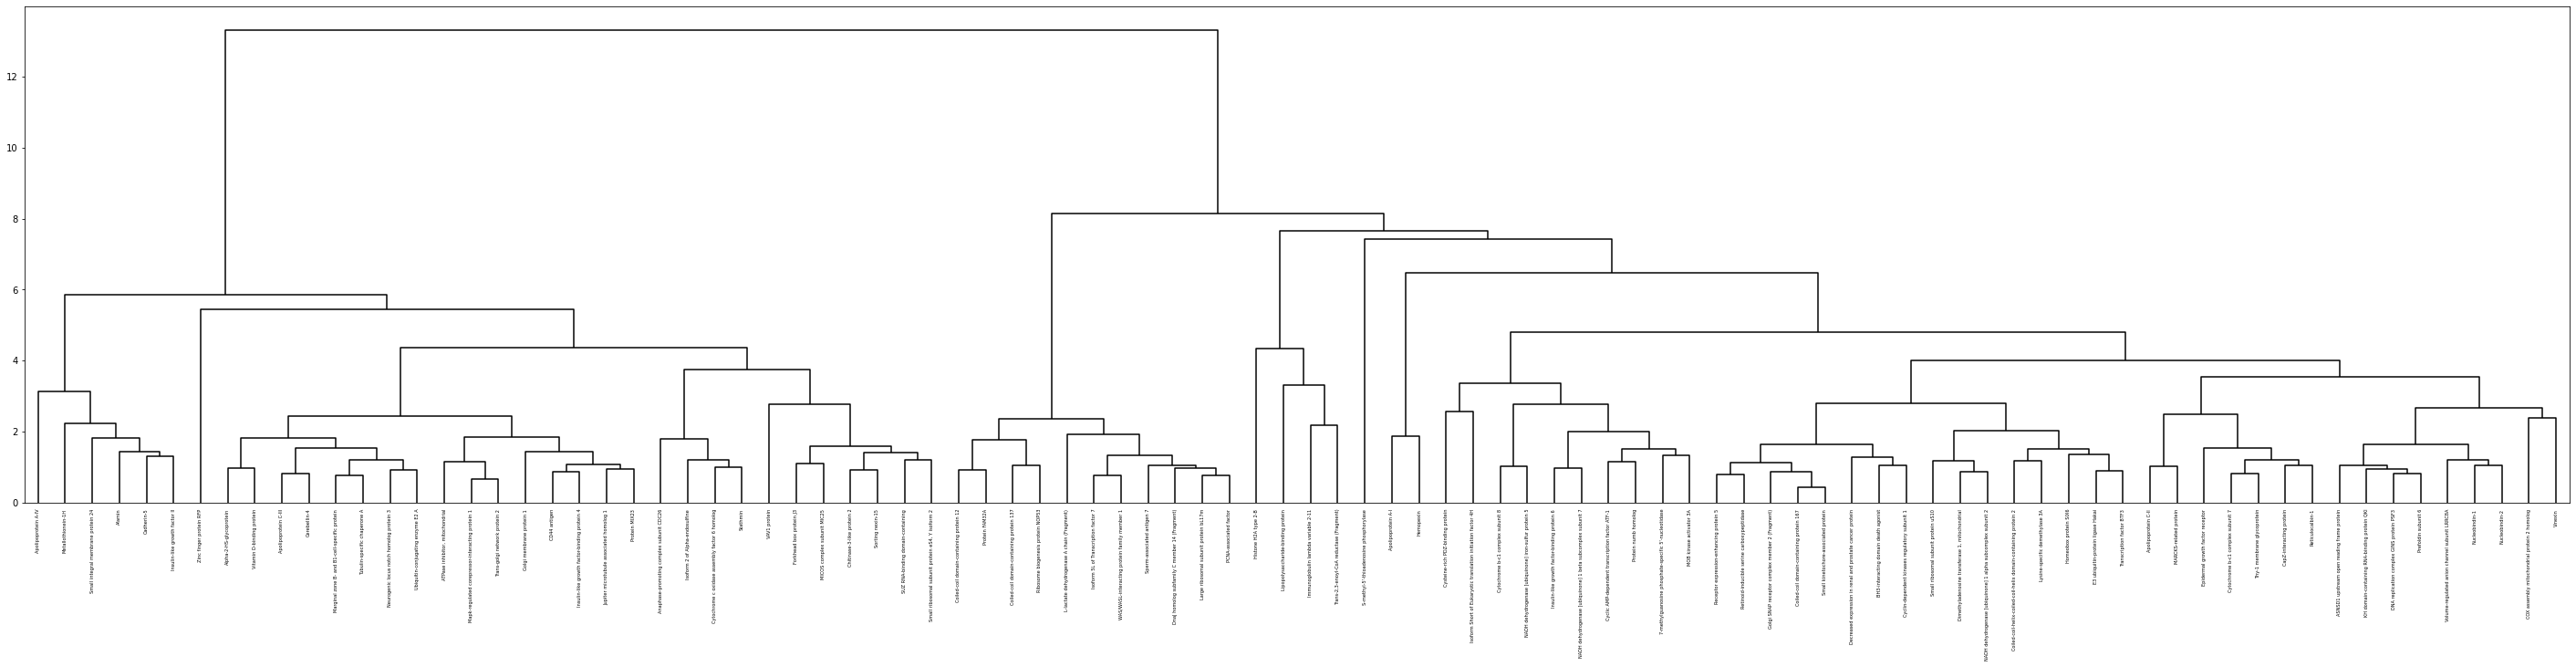

In [418]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans  # Use KMeans for clustering
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram, set_link_color_palette
from matplotlib.colors import rgb2hex
import matplotlib.gridspec as gridspec

df = df_protein_downreg

# Example SAR dictionary and DataFrame setup (unchanged)
SAR = {
    "benzene": ["NGT20-11", "NGT20-12", "NGT20-19", "NGT20-110", "NGT20-111"],
    "thiophene": ["NGT20-13", "NGT20-14", "NGT20-117", "NGT20-118"],
    "pyridine": ["NGT20-15", "NGT20-16", "NGT20-113", "NGT20-114"],
    "pyrimidine": ["NGT20-17", "NGT20-18"],
    "indole": ["NGT20-119", "NGT20-120"],
}

for key in SAR:
    SAR[key] = list(map(lambda s: s + "_1uM_vs_DMSO", SAR[key]))

suffix_to_group = {suffix: cluster for cluster, suffixes in SAR.items() for suffix in suffixes}

# Melt the DataFrame for plotting
melted_log2FC = pd.melt(
    df_protein_downreg,
    id_vars=["First.Protein.Description"],
    value_vars=[col for col in df_protein_downreg.columns if col.startswith("log2FC")],
    var_name="log2FC_Column",
    value_name="log2FC",
)

melted_log2FC["Suffix"] = melted_log2FC["log2FC_Column"].str.split("_", 1).str[1]
melted_log2FC["Group"] = melted_log2FC["Suffix"].map(suffix_to_group)

# Map bh_FDR values and calculate -log10 scale
melted_log2FC["bh_FDR"] = melted_log2FC.apply(
    lambda row: df_protein_downreg[f"bh_FDR_{row['Suffix']}"].iloc[row.name % len(df_protein_downreg)], axis=1
)
melted_log2FC["bh_FDR_log10"] = -np.log10(melted_log2FC["bh_FDR"])


# Pivot to get a matrix of First.Protein.Description vs. log2FC values for clustering
pivot_df = melted_log2FC.pivot_table(
    index="First.Protein.Description",
    columns="Suffix",
    values="log2FC"
)
pivot_df = pivot_df.fillna(1)

# Compute pairwise distances and hierarchical clustering
distance_threshold = 3.5 # Set your cutoff distance here
linkage_matrix = linkage(pivot_df, method="ward")  # You can use "average", "complete", etc.

# Define clusters using a distance threshold
cluster_labels = fcluster(linkage_matrix, t=distance_threshold, criterion="distance")

# Assign cluster labels to the pivot table
pivot_df["Cluster"] = cluster_labels

# Map cluster labels back to the original DataFrame
cluster_mapping = pivot_df["Cluster"].to_dict()
melted_log2FC["Cluster"] = melted_log2FC["First.Protein.Description"].map(cluster_mapping)

# Sort data by cluster (to reorder x-axis based on k-means clusters)
melted_log2FC["Cluster"] = melted_log2FC["Cluster"].astype(str)  # Convert to string for categorical color coding
melted_log2FC["Suffix"] = melted_log2FC["Suffix"].astype(str)

# Define colors for each cluster
unique_clusters = melted_log2FC["Cluster"].unique()
cluster_colors = {cluster: get_cmap("tab10")(i / len(unique_clusters)) for i, cluster in enumerate(unique_clusters)}
melted_log2FC["Cluster_Color"] = melted_log2FC["Cluster"].map(cluster_colors)

melted_log2FC.to_csv("temp.csv")

fig = plt.figure(figsize=(50,10))

dendro = dendrogram(
    linkage_matrix,
    labels=pivot_df.index,
    leaf_rotation=90,
    distance_sort="ascending",
    color_threshold=0,
    above_threshold_color="black",

    )

plt.show()


C:\Users\WANGLA~1\AppData\Local\Temp/ipykernel_14272/2326070489.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  group_colors = {group: get_cmap("tab10")(i / len(unique_groups)) for i, group in enumerate(unique_groups)}


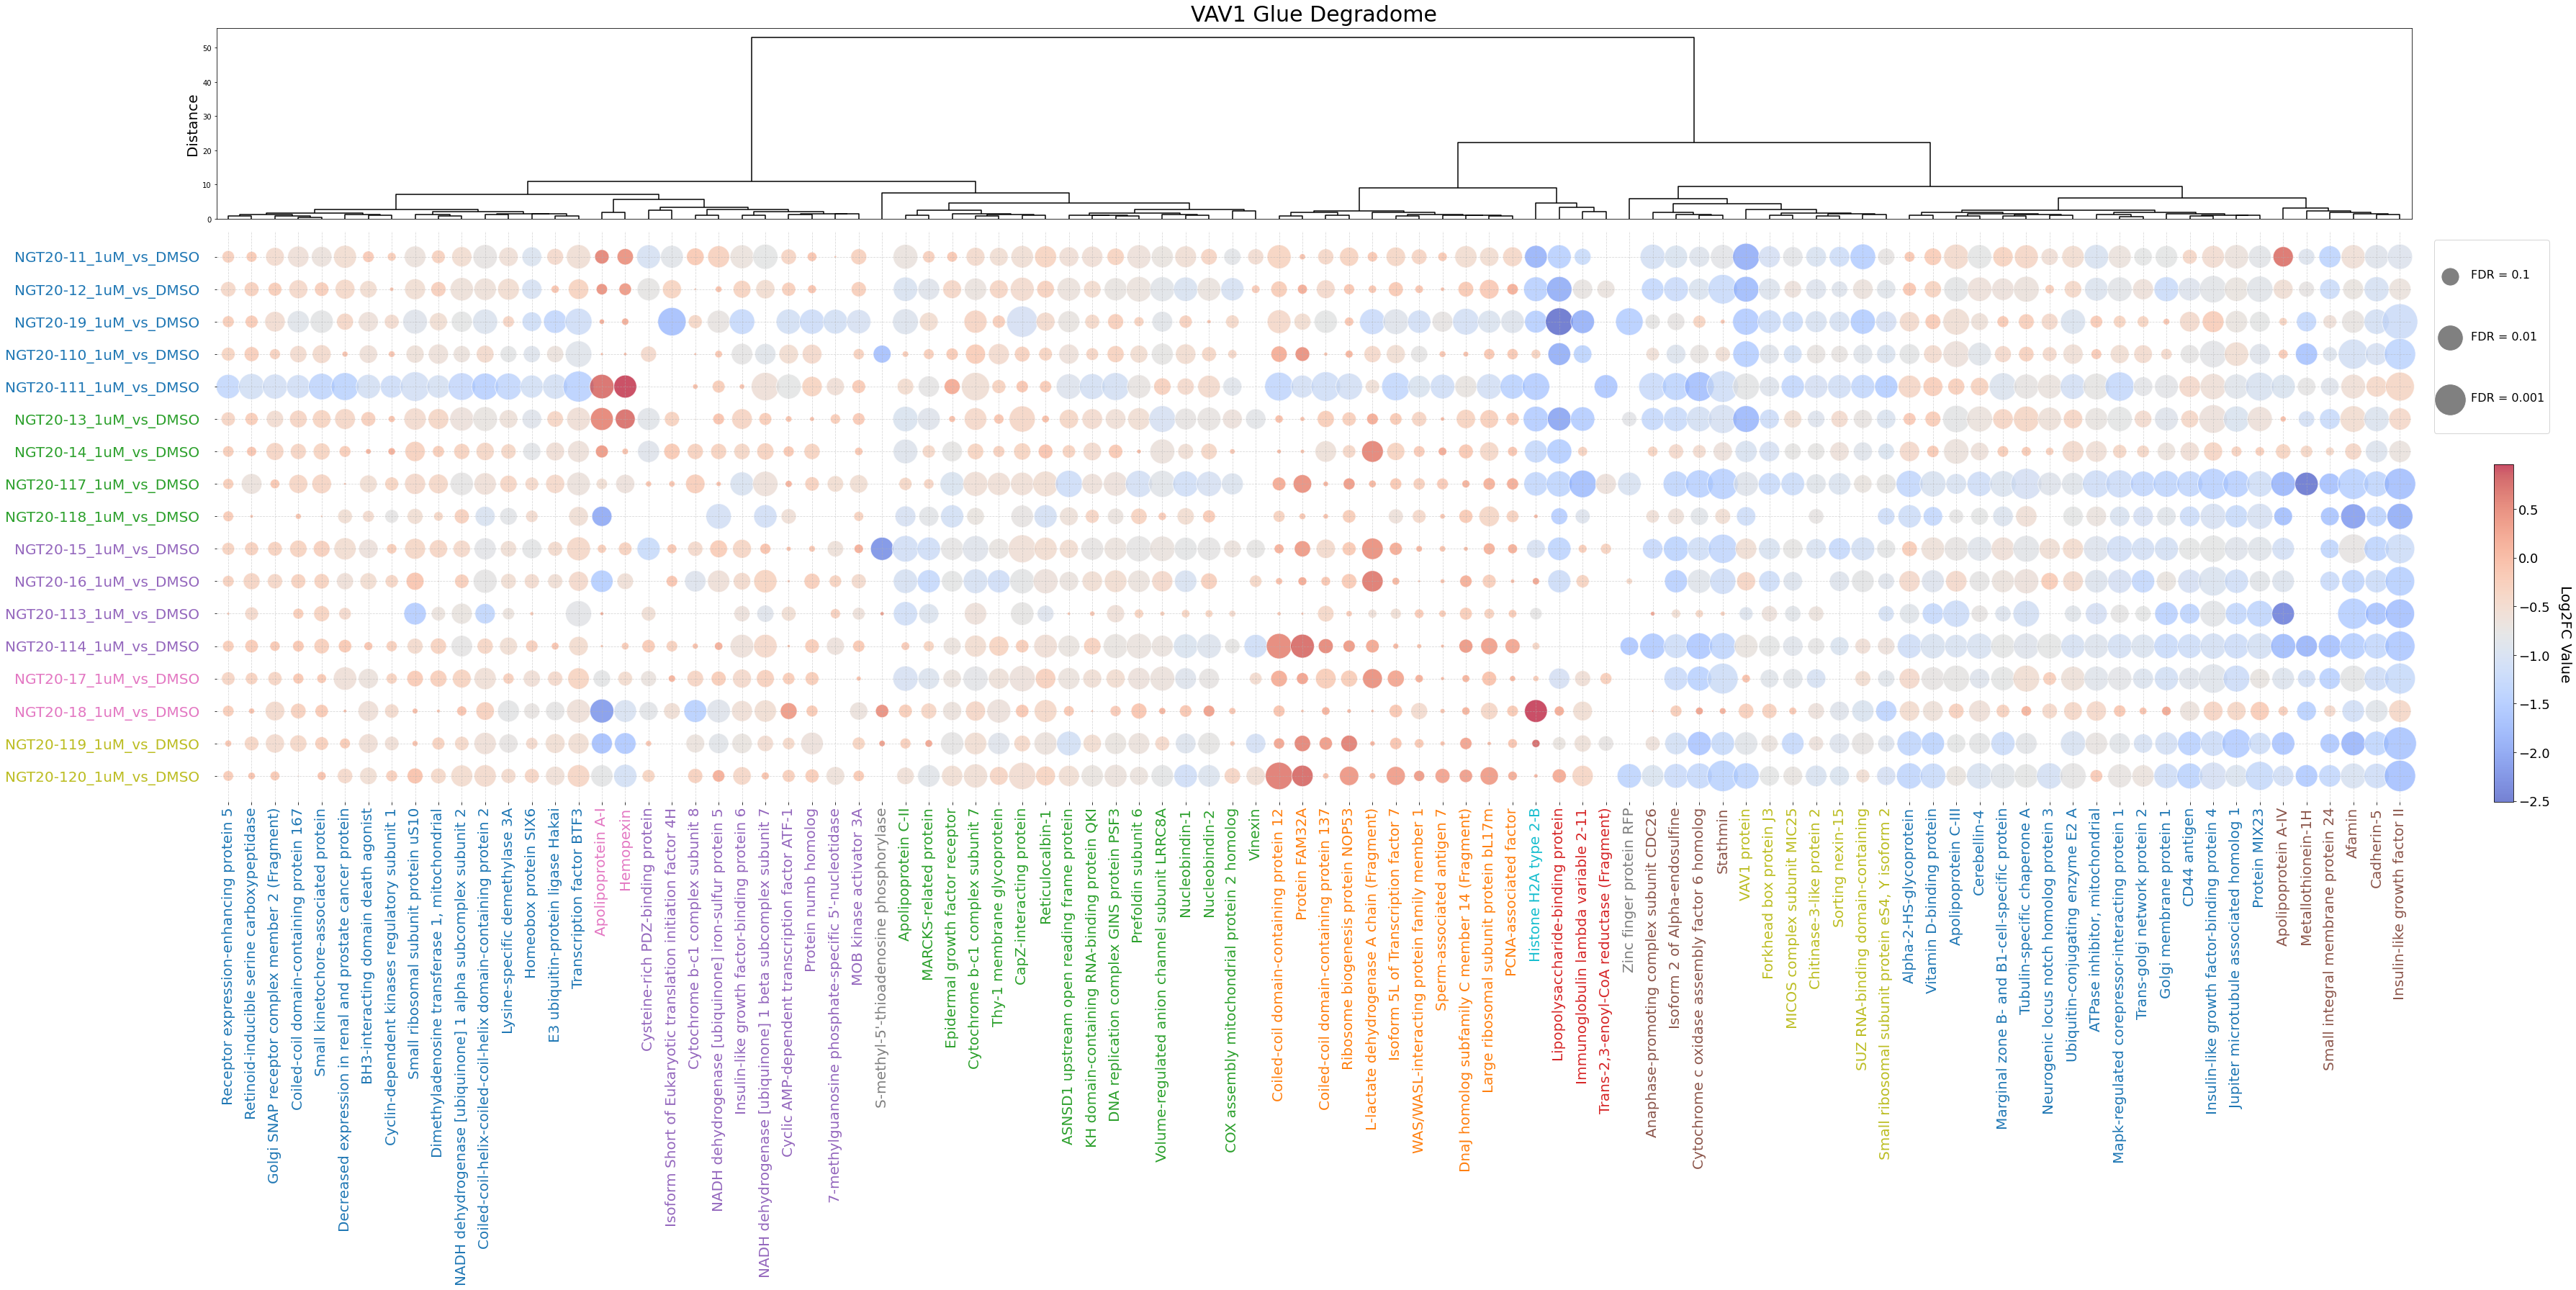

In [423]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec


# Create a linkage matrix for hierarchical clustering
linkage_matrix = linkage(pivot_df, method="ward")

# Create the figure and axis for the subplots
fig = plt.figure(figsize=(50,25))
gs = GridSpec(2, 2, figure=fig, height_ratios=[1, 3], width_ratios=[20, 1])

# First subplot for the dendrogram (use position 211 for the first plot)
ax_dendro = fig.add_subplot(gs[0,0])
#ax_dendro.axis("off")
dendro = dendrogram(
    linkage_matrix,
    labels=pivot_df.index,
    leaf_rotation=90,
    distance_sort="ascending",
    color_threshold=0,
    above_threshold_color="black",
    ax=ax_dendro
    )
# Extract the order of labels (leaf order) for custom coloring
dendrogram_order = dendro["ivl"]

# Add title and labels
ax_dendro.set_title("", fontsize=16)
ax_dendro.set_xticks([])
ax_dendro.set_ylabel("Distance", fontsize=20)

# Define group_colors for coloring y-axis labels based on SAR
unique_groups = melted_log2FC["Group"].dropna().unique()  # Groups based on SAR
group_colors = {group: get_cmap("tab10")(i / len(unique_groups)) for i, group in enumerate(unique_groups)}
melted_log2FC["Group_Color"] = melted_log2FC["Group"].map(group_colors)

# Re-order y-axis by suffix (based on SAR dictionary)
ordered_suffixes = [suffix for group in SAR.values() for suffix in group]
melted_log2FC["Suffix"] = pd.Categorical(melted_log2FC["Suffix"], categories=ordered_suffixes)
melted_log2FC["First.Protein.Description"] = pd.Categorical(
    melted_log2FC["First.Protein.Description"],
    categories=dendrogram_order,
    ordered=True
)
melted_log2FC.sort_values(by=["Suffix","First.Protein.Description"], inplace=True)

melted_log2FC.to_csv("temp.csv")

# Plotting
ax_bubble = fig.add_subplot(gs[1,0])
scatter = ax_bubble.scatter(
    melted_log2FC["First.Protein.Description"],  # x-axis as protein descriptions
    melted_log2FC["Suffix"],  # y-axis as suffixes
    c=melted_log2FC["log2FC"],  # Bubble color by log2FC
    s=melted_log2FC["bh_FDR_log10"] * 500,  # Bubble size proportional to -log10(FDR)
    cmap="coolwarm",  # Color map for log2FC
    alpha=0.7,  # Transparency
    edgecolors="w",
    clip_on=False
)

# Color y-axis labels based on group mapping (keep y-axis coloring based on SAR)
x_labels = ax_bubble.get_xticklabels()
y_labels = ax_bubble.get_yticklabels()
for label in x_labels:
    description = label.get_text()
    if description in melted_log2FC["First.Protein.Description"].values:
        cluster_id = melted_log2FC.loc[melted_log2FC["First.Protein.Description"] == description, "Cluster"].iloc[0]
        label.set_color(cluster_colors[cluster_id])
for label in y_labels:
    group = label.get_text()
    if suffix_to_group.get(group) in group_colors:
        label.set_color(group_colors[suffix_to_group[group]])

# Colorbar and size legend (same as before)
ax_empty = fig.add_subplot(gs[0,1])
ax_empty.axis('off')

gs_nested = GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[1, 1], height_ratios=[2, 3])
ax_cbar = fig.add_subplot(gs_nested[1,:])
#ax_cbar.axis('off')
cbar = plt.colorbar(scatter,  cax=ax_cbar, shrink=0.8, location="left", ticklocation="right")
cbar.set_label("Log2FC Value", fontsize=20, rotation=270, labelpad=30)
ax_cbar.tick_params(labelsize=18)  # Set tick label size (for horizontal colorbar)
ax_cbar.set_aspect(5)

ax_legend = fig.add_subplot(gs_nested[0, 0])  # Top nested plot
ax_legend.axis("off")
sizes = [1, 2, 3]  # log10(bh_FDR) values
size_labels = [f"\n\nFDR = {10**-i}\n\n" for i in sizes]
size_bubbles = [1, 2, 3]  # Corresponding bubble sizes
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=2*np.sqrt(size*500/np.pi), label=label) for size, label in zip(size_bubbles, size_labels)]
ax_legend.legend(handles=handles, title="", fontsize=16, labelspacing=0.05, borderaxespad=0.8, handleheight=0.2 # Space between axes and legend
                 #handletextpad=3.0,  # Increase padding between handles and text
                 #borderpad=2.0,  # Increase padding inside the legend box
                   # Increase spacing between labels
)

# Customize x and y labels, title, and layout
ax_bubble.set_xlabel("")
ax_bubble.tick_params(axis='x', rotation=90, labelsize=20)
ax_bubble.set_xlim(-0.5, len(set(melted_log2FC["First.Protein.Description"])) - 0.5)

ax_bubble.set_ylabel("")
ax_bubble.invert_yaxis()
ax_bubble.tick_params(axis='y', labelsize=20, pad=20)

ax_dendro.set_title("VAV1 Glue Degradome", fontsize=30, pad=10)
ax_bubble.grid(True, linestyle="--", alpha=0.5)

for spine in ax_bubble.spines.values():
    spine.set_visible(False)

plt.subplots_adjust(hspace=0.01, wspace=0.01)  # Adjust the vertical space between the subplots

plt.tight_layout()
plt.savefig("bubble_plot.png",dpi=300)
plt.show()

